In [180]:
# install.packages("rvest")
library(rvest)
# install.packages("ggplot2")
library(ggplot2)
# install.packages("dplyr")
library(dplyr)

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)

1. [Introducción](#Introducción)
1. [Business understanding](#Business-understanding)
    1. [Modelo CRISP-DM](#CRISP-DM)
    1. [Tarea: como definir exito?](#TAREA1)
1. [Data understanding](#Data-understanding)
1. [Preparing the dataset](#Preparing-dateset)
    1. [Transformación de transfer fee](#Transformación-Transfer_fee)
    1. [Transformación de Transfer_after](#Transformación-Transfer_after)
    1. [Agregar exito](#Agregar-exito)
    1. [Limpiando el set](#Limpiando)
1. [Exploratory data analysis (EDA)](#Exploratory-data-analysis)
1. [EDA - Estadistica basica](#Estadistica-basica)
    1. [Tipos de datos](#Tipos-de-datos)
    1. [Promedio y mediana](#Promedio-mediana)
    1. [Variación y desviación estándar](#Variación-desviación_estándar)
    1. [Distribuciones comunes](#Distribuciones-comunes)
    1. [Covarianza y correlación](#Covarianza-correlación)
    1. [TAREA](#TAREA2)
1. [EDA - Visualizaciones](#Visualizaciones)
    1. [Primer paso](#Primer-paso)
    1. [Graficas](#Graficas)
    1. [TAREA](#TAREA3)
1. [Modelling](#Modelling)
    1. [Training and test dataset](#Training-test)
    1. [Modelo](#Modelo)
1. [Evaluación](#Evaluación)

<a id='Intro'></a>
# Introducción
[Inicio ▲](#Indice)

La idea de este notebook es para dar un ejemplo real de los pasos entre la aquicisión de los datos y el desarrollo de un modelo. En lo que sige, vamos a examinar un dataset cuál contiene datos sobre transfers de futbalistos de America del Sur hacia Europa entre 2009 y 2014. 

La idea es que primero obtenemos un primer entendimiento del dataset. Segundo, limpiamos el dataset y tercer vamos a examinar el dataset en profundidad. Haciendo eso, vamos a tocar a distintos terminos de estadistica y vamos a utilizar varios tipos de visualizaciones para realisar un Exploratory Data Analysis. 

In [1]:
# local
df_futbol = read.csv("Transfer_data.csv", header = TRUE)

In [ ]:
# GitHub
df_futbol = read.csv("Transfer_data.csv", header = TRUE)

In [ ]:
# Google Colab
url <- "https://raw.githubusercontent.com/efviodo/idatha-data-science-course/master/notebooks/datasets/Transfer_data.csv"
df_futbol = read.csv(url, header = TRUE)

<a id='Business-understanding'></a>
# Business understanding
[Inicio ▲](#Indice)

No se puede subestimar la importancia del conocimiento del negocio en data science. Sin un buen conocimiento, siempre sera más dificil para armar el mejor modelo. Además, puede ser que se va a desarrollar modelos cuales son muy acuratos pero que no agregan nada de valor al negocio.

Por ejemplo, un club de futbol europeo, te da la oportunidad para ayudarle. Buscan un modelo para predecir o un jugador de America del Sur va a ser exitoso o no en Europa. La primera problema que surge es "Como definir exitoso?"

Hay varias formas para definir éxito, además la definición puede cambiarse según la posición de un jugador. Donde juzgan a un delantero por su goles, no es el caso para un defendor. 

#### Intenta para ti mismo dar una definición general para éxito.

<a id='Data-understanding'></a>
# Data understanding - básico
[Inicio ▲](#Indice)

Puede ser que en su definición de Exito utilizaste parámetros tal como "partidos jugados", "goles", ... Sin embargo, si nuestro dataset no contiene esos variables o si si contiene pero la calidad de la variable es muy pobre, no podemos utilizar esta definición.

Por eso, el primer paso es para obtener un primer conocimiento muy basico del dataset por un par de funciones faciles.

In [2]:
length(df_futbol) # Length no nos da la cantidad de filas, pero cantidad de variables
length(df_futbol$Player_name) # Ahora si, obtenemos la cantidad de valores del variable Player_name
names(df_futbol) # Con 'names' obtenemos todos los nombres de los variables
head(df_futbol) # Finalmente, 'Head' nos da las primeras 6 filas del dataset

[1] 16

[1] 200

[1] "X"                      "Player_name"            "Player_position"       
 [4] "Player_age"             "Transfer_season"        "Transfer_from_division"
 [7] "Transfer_from_team"     "Transfer_to_division"   "Transfer_to_team"      
[10] "Transfer_fee"           "MV_transfer"            "First_time_EU"         
[13] "Loan_Transfer"          "MV_4y_high"             "Transfer_4y"           
[16] "Transfer_after"

X,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after
1,Adrián Luna,Right Winger,19,11/12,Primera División,Defensor,LaLiga,Espanyol,"1,00 Mill. €",275000,Yes,No,1000000,Yes,0e+00
2,Adrián Ramos,Centre-Forward,23,09/10,Liga Águila II,CD América,Bundesliga,Hertha BSC,"2,00 Mill. €",1000000,Yes,No,6500000,No,NA
3,Albano Bizzarri,Goalkeeper,35,13/14,Serie A,Lazio,Serie A,Genoa,300 Th. €,NA,NA,NA,NA,NA,NA
4,Alejandro Alonso,Right Midfield,28,10/11,Ligue 1,Monaco,Ligue 1,Saint-Étienne,200 Th. €,NA,NA,NA,NA,NA,NA
5,Alejandro González,Centre-Back,25,13/14,Primera División,Peñarol,Serie A,Hellas Verona,"2,40 Mill. €",850000,Yes,No,2000000,No,NA
6,Alexis Rolín,Centre-Back,23,12/13,Primera División,Nacional,Serie A,Catania,"3,80 Mill. €",900000,Yes,No,3500000,Yes,1e+06


Aunque la significación de la mayoría de las variables son claras, algunas capaz no son. Por eso que les doy una descripción breva de todas las variables.

    * Unnamed 0                   : Nombre del jugador
    * Player_name                 : Nombre del jugador
    * Player_position             : Posición primera del jugador en la cancha
    * Player_age                  : Edad del jugador en el momento de su transfer
    * Transfer_season             : En que temporada realizó el transfer del jugador (de SA a EU)?
    * Transfer_from_division      : En que liga (en SA) estaba jugando antes su transfer?
    * Transfer_from_team          : En que club de futbol estaba jugando antes su transfer?
    * Transfer_to_division        : Hasta que liga (en EU) se transferó?
    * Transfer_to_team            : Hasta que club de futbol (en EU) se transferó?
    * Transfer_fee                : Premio del transfer
    * MV_Transfer                 : Valor de mercado del jugador al momento de su transfer.
    * First_time_EU               : Es la primera vez que el jugador juega en EU?
    * Loan_transfer               : El jugador fue alquilado en el año antes su transfer?
    * MV_4y_high                  : Valor de mercado más alto en 4 años después su transfer.
    * Transfer_4y                 : El jugador realizó otro transfer en 4 años después su transfer inicial?
    * Transfer_after              : Precio del transfer despúes el primer transfer. 

#### Ahora, mirando los distintos variables y sus valores, cambiarías algo en su definición? Agregarías algun otro variable?

### Definición sugerida
Nos ponemos en la mente del club. Primero que nada hay que entender que en 99% de los casos un club - o cualquier otra organización - implementa una sistema de machine learning con el objetivo de ganar plata. Por eso, que por la definición de éxito, tiene sentido tomar en cuenta la imagen financiera, como hecho en la definición abajo.

Un club compra un jugador para precio X. Si en 4 años, se pueden vender el jugador para mas plata o el jugador se queda al club pero con un valor cual es mayor al premio inicial, el transfer fue exitoso.

<a id='Preparing-dataset'></a>
# Preparing the dataset
[Inicio ▲](#Indice)

In [7]:
df_futbol

,X,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after
1,1,Adrián Luna,Right Winger,19,11/12,Primera División,Defensor,LaLiga,Espanyol,"1,00 Mill. €",275000,Yes,No,1000000,Yes,0
2,2,Adrián Ramos,Centre-Forward,23,09/10,Liga Águila II,CD América,Bundesliga,Hertha BSC,"2,00 Mill. €",1000000,Yes,No,6500000,No,NA
3,3,Albano Bizzarri,Goalkeeper,35,13/14,Serie A,Lazio,Serie A,Genoa,300 Th. €,NA,NA,NA,NA,NA,NA
4,4,Alejandro Alonso,Right Midfield,28,10/11,Ligue 1,Monaco,Ligue 1,Saint-Étienne,200 Th. €,NA,NA,NA,NA,NA,NA
5,5,Alejandro González,Centre-Back,25,13/14,Primera División,Peñarol,Serie A,Hellas Verona,"2,40 Mill. €",850000,Yes,No,2000000,No,NA
6,6,Alexis Rolín,Centre-Back,23,12/13,Primera División,Nacional,Serie A,Catania,"3,80 Mill. €",900000,Yes,No,3500000,Yes,1000000
7,7,Alexis Zapata,Attacking Midfield,18,13/14,Liga Águila II,Envigado,LaLiga,Granada CF,"1,18 Mill. €",NA,Yes,No,700000,Yes,NA
8,8,Allan,Central Midfield,21,12/13,Segunda División,Maldonado,LaLiga,Granada CF,"3,00 Mill. €",3000000,Yes,Yes,11500000,Yes,3000000
9,9,Álvaro González,Central Midfield,25,10/11,Primera División,Nacional,Serie A,Lazio,"2,00 Mill. €",800000,Yes,No,7500000,No,NA
10,10,André Dias,Centre-Back,30,09/10,Série A,São Paulo,Serie A,Lazio,"2,50 Mill. €",NA,NA,NA,NA,NA,NA


Mirando el dataset vemos algo raro en la variable Transfer_fee no contiene valores numericos. Además, vemos que hay filas cuales refieren a "loan transfers" donde un club alquila un jugador pero no lo compra definitivamente. Borramos esas filas y después transformamos los valores a numericos.

## Borrar todos "loan transfers"

In [8]:
df_futbol <- df_futbol[!grepl("Loan", df_futbol$Transfer_fee),]

In [9]:
length(df_futbol$Player_name)

[1] 166

<a id='Transformación-Transfer_fee'></a>
## Transformación de transfer fee
[Inicio ▲](#Indice)

Hasta ahora, el premio del transfer o Transfer_fee, todavía no es un numéro. Por eso tenemos que transformarlo. Lo hacemos por los próximos pasos.

1) borrar el ,

2) cambiar Mill por 0000 (porque ya contiene dos ceros)

3) Cambiar TH. por 000

4) Cortar hasta el ultimo numero

5) Transformar el tipo de valor, de character a numeric

In [10]:
unique(df_futbol$Transfer_fee)

[1] 1,00 Mill. €  2,00 Mill. €  300 Th. €     200 Th. €     2,40 Mill. € 
 [6] 3,80 Mill. €  1,18 Mill. €  3,00 Mill. €  2,50 Mill. €  5,50 Mill. € 
[11] 900 Th. €     1,50 Mill. €  2,30 Mill. €  1,35 Mill. €  6,00 Mill. € 
[16] 4,00 Mill. €  100 Th. €     1,30 Mill. €  1,90 Mill. €  1,73 Mill. € 
[21] 500 Th. €     2,80 Mill. €  7,47 Mill. €  8,00 Mill. €  13,50 Mill. €
[26] 7,00 Mill. €  2,49 Mill. €  17,00 Mill. € 5,00 Mill. €  2,10 Mill. € 
[31] 3,50 Mill. €  3,30 Mill. €  4,20 Mill. €  7,50 Mill. €  1,75 Mill. € 
[36] 750 Th. €     1,20 Mill. €  800 Th. €     4,50 Mill. €  4,60 Mill. € 
[41] 1,60 Mill. €  3,36 Mill. €  3,72 Mill. €  6,20 Mill. €  2,20 Mill. € 
[46] 3,65 Mill. €  1,25 Mill. €  700 Th. €     385 Th. €     4,70 Mill. € 
[51] 14,00 Mill. € 40,00 Mill. € 5,30 Mill. €  230 Th. €     1,80 Mill. € 
[56] 5,70 Mill. €  1,28 Mill. €  3,10 Mill. €  250 Th. €     3,70 Mill. € 
[61] 370 Th. €     88,20 Mill. € 730 Th. €     790 Th. €     16,50 Mill. €
[66] 32,00 Mill. € 400 Th. €     2,35 Mill. €  950 Th. €     1,40 Mill. € 
[71] 19,73 Mill. € 11,90 Mill. € 10,50 Mill. € 4,90 Mill. €  10,00 Mill. €
[76] 1,70 Mill. €  2,25 Mill. €  3,60 Mill. €  5,40 Mill. € 
91 Levels: 1,00 Mill. € 1,18 Mill. € 1,20 Mill. € 1,25 Mill. € ... Loan fee:800 Th. €

In [11]:
df_futbol$Transfer_fee <- gsub(",", "" , df_futbol$Transfer_fee)
df_futbol$Transfer_fee <- gsub(" Mill.", "0000" , df_futbol$Transfer_fee)
df_futbol$Transfer_fee <- gsub(" Th.", "000" , df_futbol$Transfer_fee)
df_futbol$Transfer_fee <- gsub('.{2}$', '', df_futbol$Transfer_fee)

In [12]:
df_futbol$Transfer_fee <- sapply(df_futbol$Transfer_fee, as.numeric)

<a id='Agregar-exito'></a>
## Agregar exito
[Inicio ▲](#Indice)

In [13]:
df_futbol$succeeded <- (df_futbol$Transfer_4y == "Yes" 
                            & 
                        df_futbol$Transfer_after > df_futbol$Transfer_fee 
                            |
                        df_futbol$Transfer_4y == "No" 
                            &
                        df_futbol$MV_4y_high > df_futbol$Transfer_fee)

### TAREA: Chequea o implementamos correctamente la definición de exito

In [14]:
df_futbol

,X,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after,succeeded
1,1,Adrián Luna,Right Winger,19,11/12,Primera División,Defensor,LaLiga,Espanyol,1000000,275000,Yes,No,1000000,Yes,0,FALSE
2,2,Adrián Ramos,Centre-Forward,23,09/10,Liga Águila II,CD América,Bundesliga,Hertha BSC,2000000,1000000,Yes,No,6500000,No,NA,TRUE
3,3,Albano Bizzarri,Goalkeeper,35,13/14,Serie A,Lazio,Serie A,Genoa,300000,NA,NA,NA,NA,NA,NA,NA
4,4,Alejandro Alonso,Right Midfield,28,10/11,Ligue 1,Monaco,Ligue 1,Saint-Étienne,200000,NA,NA,NA,NA,NA,NA,NA
5,5,Alejandro González,Centre-Back,25,13/14,Primera División,Peñarol,Serie A,Hellas Verona,2400000,850000,Yes,No,2000000,No,NA,FALSE
6,6,Alexis Rolín,Centre-Back,23,12/13,Primera División,Nacional,Serie A,Catania,3800000,900000,Yes,No,3500000,Yes,1000000,FALSE
7,7,Alexis Zapata,Attacking Midfield,18,13/14,Liga Águila II,Envigado,LaLiga,Granada CF,1180000,NA,Yes,No,700000,Yes,NA,NA
8,8,Allan,Central Midfield,21,12/13,Segunda División,Maldonado,LaLiga,Granada CF,3000000,3000000,Yes,Yes,11500000,Yes,3000000,FALSE
9,9,Álvaro González,Central Midfield,25,10/11,Primera División,Nacional,Serie A,Lazio,2000000,800000,Yes,No,7500000,No,NA,TRUE
10,10,André Dias,Centre-Back,30,09/10,Série A,São Paulo,Serie A,Lazio,2500000,NA,NA,NA,NA,NA,NA,NA


<a id='Limpiando'></a>
## Limpiando el dataset
[Inicio ▲](#Indice)

Borrar filas donde succeeded es NA

In [15]:
na_rows <- which(is.na(df_futbol$succeeded))
df_futbol <- df_futbol[-c(na_rows), ]

In [16]:
length(df_futbol$succeeded)

[1] 134

<a id='Exploratory-data-analysis'></a>
# Exploratory data analysis (EDA)
[Inicio ▲](#Indice)

Un EDA es una etapa extremadamente importante en data science o en machine learning. A un alto nivel, EDA es el práctica de describir los datos por técnicas estadísticas y por visualización para extraer aspectos importantes y ocultos. 

En lo que sige vamos a ver primero un par de técnicas estadisticas basicas, como implementarlas en R y como nos informan sobre nuestro dataset. 

Segundo, vamos a ver varias tecnicas de visualización que ofrece R y como apliquarlas en nuestro dataset.

<a id='Estadistica-basica'></a>
# EDA - Estadistica basica
[Inicio ▲](#Indice)

En este parte vamos a examinar termos y medidas de la estadistica basica. Aunque parecen basicos, son muy importante y forman el baso de estadistica, data science y machine learning.

<a id='Tipos-de-datos'></a>
## Tipos de datos
[Inicio ▲](#Indice)

Hay 3 grandes tipos de datos:

### Numerical
Capaz es el tipo más común y en realidad es todo lo que es cuantificable, como por ejemplo: valor de un jugador o edad de un jugador.

En numerical hay dos grandes tipos sea:
#### Discreta
Discreta son datos cuales son basados en INTEGERS y asi tienen un limite de posibilidades. Por ejemplo: la cantidad de personas en este clase. Son 25 o 35 pero nunca puede ser 35,61. Ejemplo en nuestro dataset puede ser edad.

#### Continua
En continua, es distinto, no hay un limite. Cuanto tiempo va tomar este clase? No precisa ser 8 horas, puede ser 7h 56m 12s 88ms ... Ejemplo en nuestro dataset puede ser valor de un jugador.

### Categorical
Datos categoricales son datos cualitativos cuales NO tienen una significación matematical. Por ejemplo departementos en Uruguay. Yo vivo en Montevideo, alguien en Canelones, ... Igual podríamos asignar un numéro a todos los departementos pero no tiene significación matematical. Departemento 1 + departemento 4 no es igual a departemento 5. Otro ejemplo en nuestro dataset es la posición del jugador.

### Ordinal
Esta forma de datos es casí un mezcla de numerical y categorical. Este tiene una significación matematical. Por ejemplo el año del transfer. Se sabe que 2009 es menor o antes de 2011. Otro ejemplo son los ratings en YouTube con estrellas. 


<a id='Promedio-Mediana'></a>
## Promedio VS Mediana
[Inicio ▲](#Indice)

El promedio es el "average", la suma de todos los valores dividido por la cantidad de valores. En el caso de Valor promedio de jugadores sera algo tipo (100.000 + 2.000.000 + ... + 950.000) / (cantidad de jugadores).

En el caso de mediano, es en realidad el valor medio cuando ordenamos todos los valores de peaueño a mayor. El avantaje de la mediana es que NO es influenciado por outliers o valores extremos. Lo vemos abajo.

In [ ]:
mean(df_futbol$Transfer_fee)

In [ ]:
median(df_futbol$Transfer_fee)

Lo que pasó es que hay algun(es) transfers de muy alto valor. Pueden adivinar quien es?

<a id='Variación-desviación_estándar'></a>
## Variación y desviación estándar
[Inicio ▲](#Indice)

Basicamente son medidas de la propagación de una distribución de datos. En nuestro dataset hay premios de transfer entre gratis o cero y 80.000.000 cual parece mucho, pero es? En realidad vamos a mirar al promedio para decir o es mucho o no. Viendo que el promedio es 4.000.000, hay una propagación de 20 veces el promedio cual es bastante. En realidad así no calculamos la variación pero es una forma facíl para darles una idea.

La forma correcta para calcular la varianza es solo "el promedio de las diferencias al cuadrado del promedio del dataset". En este ejemplo sera [[(100.000 - 4712807)² + (2.000.000 - 4712807)² + ... + (950.000 - 4712807)²] / (cantidad de jugadores)].

Mientras que la desviación estándar es simplemente el raíz cuadrado de la varianza.

In [161]:
var(df_futbol$Transfer_fee)

66023779515334.07

In [163]:
sd(df_futbol$Transfer_fee)

8125501.800832615

Vemos que la desviación estánder es mas pequeño pero también es más entendible. En este ejemplo es 8.125.501,80 y normalmente se dice que cualquier valor que es mas lejos del promedio que 1 desviación estándar es un outlier o valor extremo.

<a id='Distribuciones-comunes'></a>
## Distribuciones comunes
[Inicio ▲](#Indice)


Uniforme

Normal / Gaussian

Exponencial



In [152]:
uniform <- runif(50000, min = 0, max = 30)
# Primer numero es cantidad de valores que queremos generar.

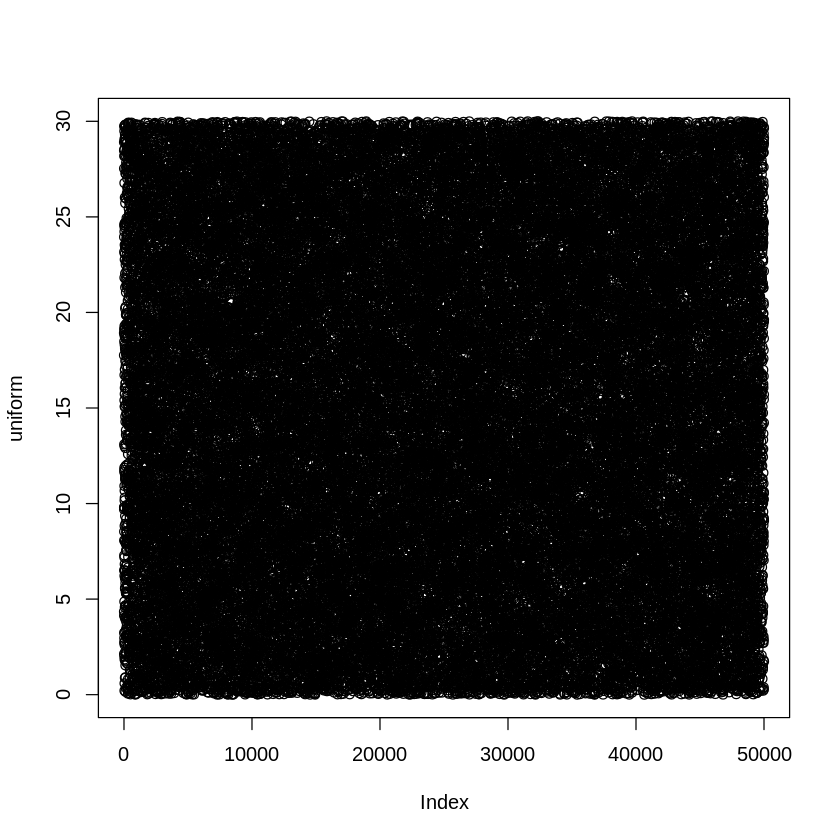

In [153]:
plot(uniform)

### Distribución normal / Gaussian
Una distribución con una concentración sobre el promedio y con una propagación de su desviación estándar. Abajo vemos un ejemplo.

In [164]:
rnorm(20, 10, 3)

[1] 12,230052  5,255945 13,584911 16,322747  4,195150 11,468376 15,523702
 [8]  6,890386 12,851069 10,405985  8,723857  9,358166  8,169344 11,092809
[15] 13,087800  8,177834 10,154096  8,843052  8,430961  9,950014

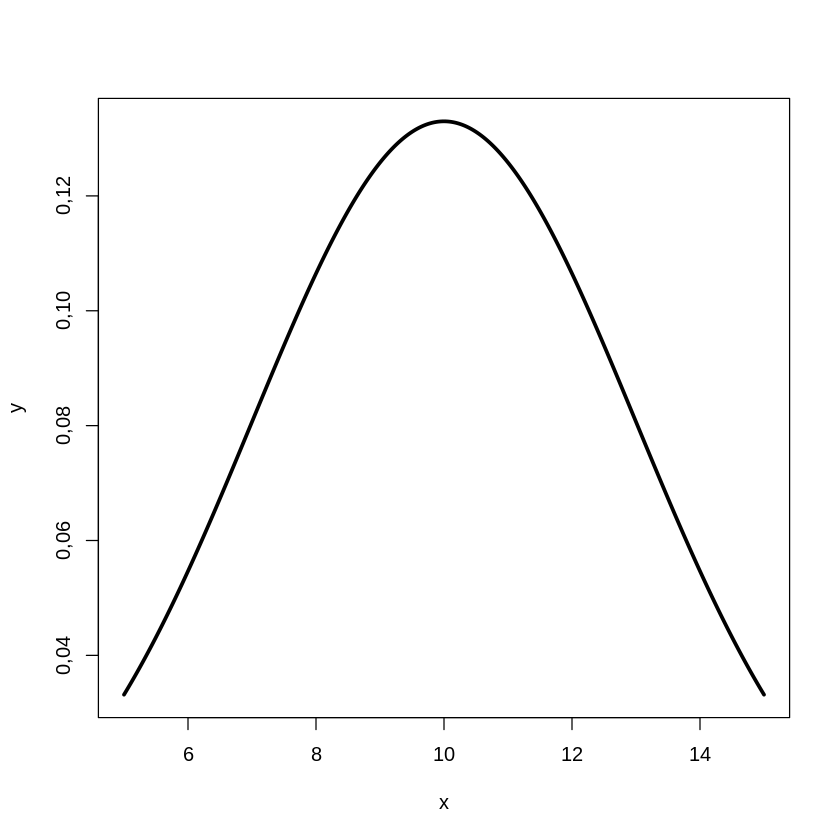

In [168]:
x <- seq(5, 15, length=1000)
y <- dnorm(x, mean=10, sd=3)
plot(x, y, type="l", lwd=3)

### Exponencial
La función de distribución de probabilidad exponencial es una distribución donde las cosas se caen de manera exponencial.

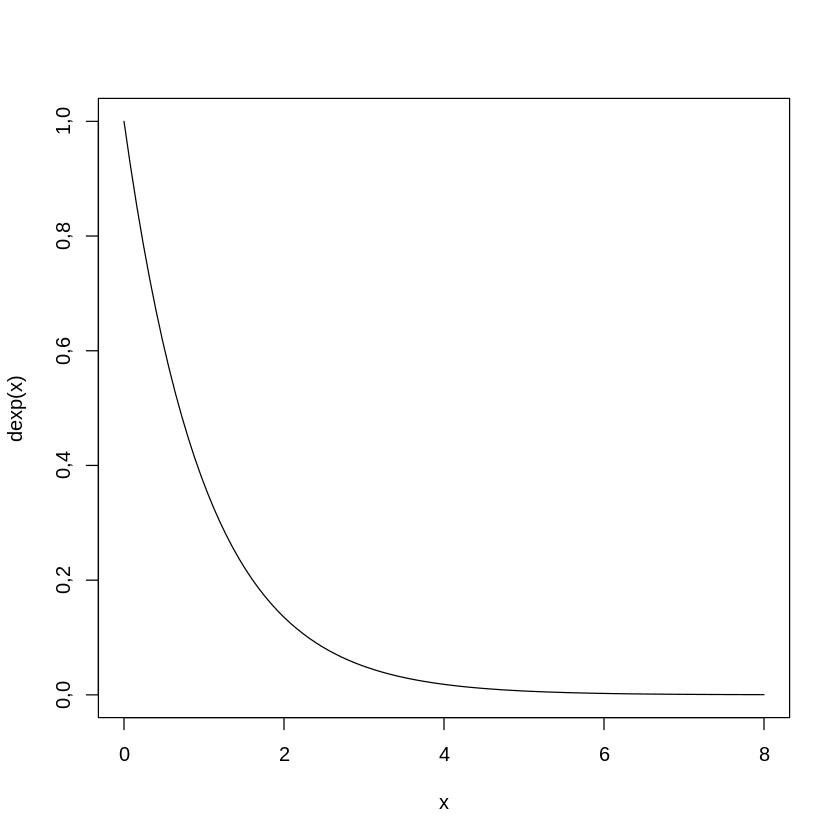

In [170]:
curve(dexp, xlim=c(0,8))

<a id='Covarianza-correlación'></a>
## Covarianza y correlación
[Inicio ▲](#Indice)

Estas son formas de medir si dos atributos diferentes están relacionados entre sí en un conjunto de datos. Eso es importantisimo para saber. Por ejemplo: hay una correlación entre mis gastos de publicidad y mis ventas? Si no hay, no te sirve invertir en publicidad. Y si hay, hasta que punta? Que relación hay entre los dos? Exponential? Linear?

La diferencia entre covarianza y correlación es que el valor de correlación siempre esta entre 0 - 1, mientras que el valor de covarianza es dependiente de la varianza, por eso que la correlación es más facíl para entender.   

In [183]:
df_corr <- df_futbol[is.na(df_futbol$MV_transfer) == FALSE,]

In [172]:
cov(df_corr$MV_transfer, df_corr$Transfer_fee)

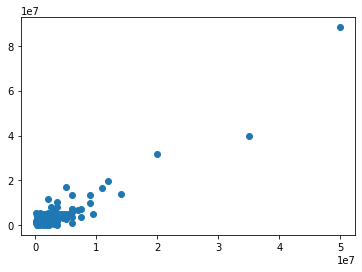

In [187]:
cor(df_corr$MV_transfer, df_corr$Transfer_fee)

<a id='TAREA2'></a>
# TAREA: Estadistica basica + Business understanding
[Inicio ▲](#Indice)

#### 1. Que tipo de datos son los variables: Transfer_to_division, MV_transfer, Edad, Transfer_after?

Categorical, Numerical (continua), Numerical(discreto), Numerical (continua)

#### 2. Calcula el promedio, mediana, varianza y desvación estandar de Transfer_fee y MV_4y_high

In [190]:
mean(df_futbol$Transfer_fee)  
median(df_futbol$Transfer_fee)
var(df_futbol$Transfer_fee)
sd(df_futbol$Transfer_fee)

SyntaxError: invalid syntax (<ipython-input-190-c967893a97bb>, line 1)

In [44]:
df_MV4y <- df_futbol[is.na(df_futbol$MV_4y_high) == FALSE,]
mean(df_MV4y$MV_4y_high)  
median(df_MV4y$MV_4y_high)
var(df_MV4y$MV_4y_high)
sd(df_MV4y$MV_4y_high)

[1] 10414159

[1] 4500000

[1] 3,80765e+14

[1] 19513201

#### 3. Calcula la covarianza y correlacion entre Transfer_fee y MV_4y_high. Esperas que es mas alto o bajo de la correlacion entre Transfer_fee y MV_transfer? Que es y podes encontrar una explicación?

In [45]:
cov(df_MV4y$Transfer_fee, df_MV4y$MV_4y_high)
cor(df_MV4y$Transfer_fee, df_MV4y$MV_4y_high)

[1] 1,595353e+14

[1] 0,8490023

La correlación entre Transfer_fee (precio del jugador) y MV_4y_high (valor mas alto del jugador en los 4 años enseguidos) es menor porque en 4 años muchas cosas pueden pasar. Un jugador se vuelve el mejor del mundo o no juega mas por leciones y entonces su valor cambia mucho de su precio inicial. Dicho eso, 0.85 aún es muy alto y muestra gran correlación.

#### 4. Calcula el promedio y mediana de Transfer_fee y MV_4y_high por jugadores que son exitosos y por jugadores que no fueron exitosos. Hay una diferencia entre los dos datasets? Que significa eso? Hay una diferencia entre promedio y median, porque si o no?

In [46]:
df_suc <- df_futbol[df_futbol$succeeded == TRUE,]
df_nosuc <- df_futbol[df_futbol$succeeded == FALSE,]

In [47]:
df_sucMV <- df_suc[is.na(df_suc$MV_4y_high) == FALSE,]
df_nosucMV <- df_nosuc[is.na(df_nosuc$MV_4y_high) == FALSE,]

In [49]:
mean(df_nosucMV$Transfer_fee)  
median(df_nosucMV$Transfer_fee)

mean(df_nosucMV$MV_4y_high)  
median(df_nosucMV$MV_4y_high)

[1] 4187969

[1] 2650000

[1] 4679688

[1] 3e+06

In [50]:
mean(df_sucMV$Transfer_fee)  
median(df_sucMV$Transfer_fee)

mean(df_sucMV$MV_4y_high)  
median(df_sucMV$MV_4y_high)

[1] 6183061

[1] 3e+06

[1] 17904082

[1] 1e+07

Primera que nada observamos que el promedio y mediana del valor mas alto de jugadores exitosos es bastante mas alto que los no-exitosos, cual es muy logico, jugadores exitosos van a tener mejor valor que los non-exitosos.

Al otro lado, cuando ponemos foque en precio, vemos que aunque vemos la misma tendencia, la diferencia es mucho más chico, lo que quiere decir que altos precios no necesariamente garantan jugadores exitos.

Por ultimo, vemos aue hqy una grande diferencia entre los promedios y medianas. Eso tiene que ver con valores extremos, entonces nuestro dataset contiene bastante jugadores con un valor o precio muy alto comparado con el promedio.

#### 5. Compara la edad promedio y mediana entre el grupo de succeeded y non succeeded.

In [51]:
mean(df_suc$Player_age)
median(df_suc$Player_age)

[1] 22,02

[1] 22

In [52]:
mean(df_nosuc$Player_age)
median(df_nosuc$Player_age)

[1] 23,21429

[1] 23

La edad promedio/mediana de jugadores exitos es 22 mientras lo de jugadores no-exitosos es 23. Parece que jugadores jovenes estan mas exitosos aunque un año no es una grande diferencia.

#### 6. Compara el promedio, mediana y desveción estandar de Transfer_after entre los dos grupos. Compara también con el MV_high que ya calculaste arriba.

In [53]:
df_sucTA <- df_suc[is.na(df_suc$Transfer_after) == FALSE,]
df_nosucTA <- df_nosuc[is.na(df_nosuc$Transfer_after) == FALSE,]

In [54]:
mean(df_sucTA$Transfer_after)
median(df_sucTA$Transfer_after)
sd(df_sucTA$Transfer_after)

[1] 16796364

[1] 7e+06

[1] 38367509

In [55]:
mean(df_nosucTA$Transfer_after)
median(df_nosucTA$Transfer_after)
sd(df_nosucTA$Transfer_after)

[1] 1564430

[1] 0

[1] 2633189

Primero que nada, hay una tremenda diferencia entre los promedios/medianas del precio de nuevos transfers de jugadores exitos y no-exitosos, cual tiene sentido. 

Otra observación es que jugadores no-exitosos, estan vendido muchas veces gratis. Vemos eso porque la mediana es 0.

Además, vemos que el sd de exitosos es muy alto, cual indica que los precios de nuevos transfers varian mucho.

Por ultimo, cuando comparamos estas medidas con MV_4_high, vemos una tendencia igual, cual es bastante logico.

#### 7. Compara el Transfer_fee promedio y mediana cual se paga en todos los distintos ligas de Europa. Hay una diferencia entre ellos? 

In [56]:
PL_amount <-       length(which(df_futbol$Transfer_to_division == "Premier League"))
BundesL_amount <-  length(which(df_futbol$Transfer_to_division == "Bundesliga"))
LaLiga_amount <-   length(which(df_futbol$Transfer_to_division == "LaLiga"))
Ligue1_amount <-   length(which(df_futbol$Transfer_to_division == "Ligue 1"))
SerieA_amount <-   length(which(df_futbol$Transfer_to_division == "Serie A"))

In [57]:
PL_mean <- mean(df_futbol[df_futbol$Transfer_to_division == "Premier League", "Transfer_fee"])
PL_mean

[1] 7462857

In [59]:
BL_mean <- mean(df_futbol[df_futbol$Transfer_to_division == "Bundesliga", "Transfer_fee"])
BL_mean

[1] 3700000

In [60]:
LL_mean <- mean(df_futbol[df_futbol$Transfer_to_division == "LaLiga", "Transfer_fee"])
LL_mean

[1] 5713667

In [62]:
L1_mean <- mean(df_futbol[df_futbol$Transfer_to_division == "Ligue 1", "Transfer_fee"])
L1_mean

[1] 4939000

In [17]:
SA_mean <- mean(df_futbol[df_futbol$Transfer_to_division == "Serie A", "Transfer_fee"])
SA_mean

[1] 3789355

El Premier League paga mucho más que las otras ligas. Bundesliga y Serie A lo menos.

<a id='Visualización'></a>
# EDA - Visualización
[Inicio ▲](#Indice)

Técnicas de visualización tiene una grande importancia en el mundo de analíticas de (big) data. Nos da la oportunidad para dar conocimiento a miles de datos por resumirlos en una sola graphica. 

...

<a id='Primer-paso'></a>
## Primer paso
[Inicio ▲](#Indice)

Aunque parece muy o igual demasiado basico y se puede argumentar que no es necesariamente 'visual', la funcion 'summary' ofrece mucho valor. Da la posibilidad al usuario para ver un resumen de todos los variables facilmente en un tabla simple.

In [64]:
summary(df_futbol)

       X                      Player_name            Player_position
 Min.   :  1,00   Maicosuel         :  4   Centre-Back       :28    
 1st Qu.: 44,25   Marcos Angeleri   :  4   Centre-Forward    :23    
 Median : 98,00   Adrián Luna       :  1   Central Midfield  :14    
 Mean   : 97,76   Adrián Ramos      :  1   Left Winger       :12    
 3rd Qu.:150,75   Alejandro González:  1   Defensive Midfield:11    
 Max.   :200,00   Alexis Rolín      :  1   Attacking Midfield:10    
                  (Other)           :122   (Other)           :36    
   Player_age    Transfer_season      Transfer_from_division
 Min.   :18,00   09/10:21        Série A         :41        
 1st Qu.:20,00   10/11:31        Primera División:38        
 Median :23,00   11/12:27        Torneo Final    :34        
 Mean   :22,77   12/13:29        Brazil          :10        
 3rd Qu.:25,00   13/14:26        Liga Águila II  : 6        
 Max.   :35,00                   Primera Nacional: 2        
                     

<a id='Graficas'></a>
## Graficas
[Inicio ▲](#Indice)

### Scatterplot
Para ser capaz de interpretar bien un scatterplot (o cualquier graphica), los limites de los axis son muy importante. En el ejemplo abajo vemos que la graphica incluye unos valores extremos. Igual, es bastante sencillo exlcuirlos de la graphica con ylim y xlim. Intentalo para ti mismo.

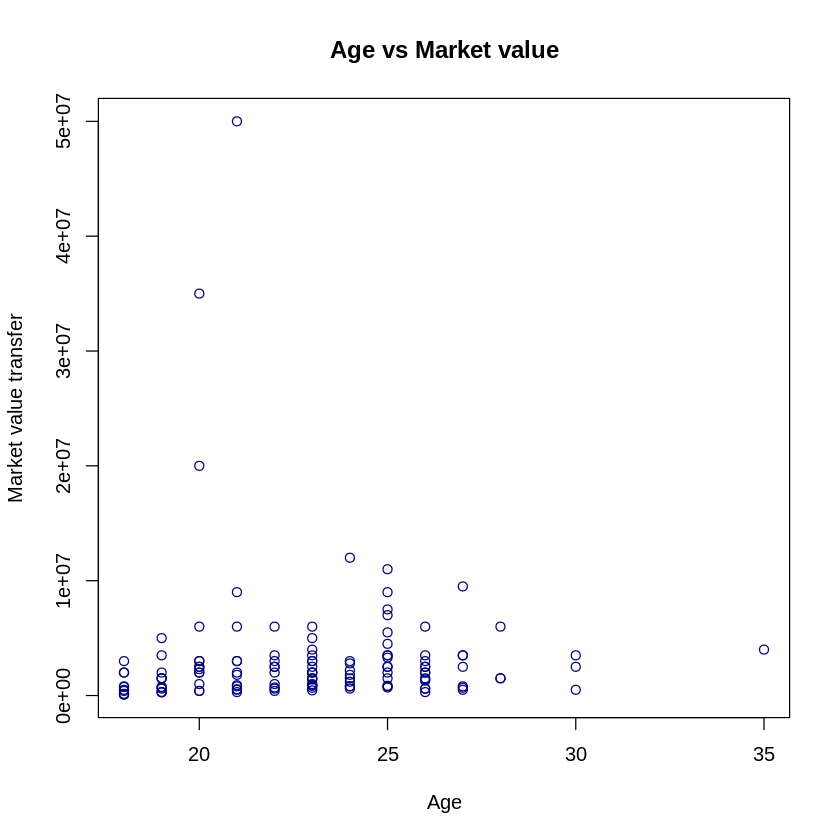

In [65]:
plot(df_futbol$Player_age, df_futbol$MV_transfer,
     col = "dark blue", 
     xlab = "Age", 
     ylab = 'Market value transfer',
     main = 'Age vs Market value'
     #ylim = c(0, 15000000),
     #xlim = c(15,30)
    )

### Histogram
Un histograma o diagrama de columna es la representación gráfica de la distribución de frecuencia de datos agrupados en clases. En el ejemplo abajo, presentamos la cantidad de jugadores por posición. Igual vemos que no esta muy interpretable, sería mejor con menos grupos (como vamos a ver más abajo). 

Cuando utilizamos la función plot en R sobre un variable categorical, nos da un histogram. También podríamos utilizar plot(table(df$variable)). Table es la presentación non-grafica de un variable.


Attacking Midfield   Central Midfield        Centre-Back     Centre-Forward 
                10                 14                 28                 23 
Defensive Midfield         Goalkeeper      Left Midfield        Left Winger 
                11                  5                  3                 12 
         Left-Back     Right Midfield       Right Winger         Right-Back 
                 6                  0                  8                  8 
    Second Striker 
                 6 

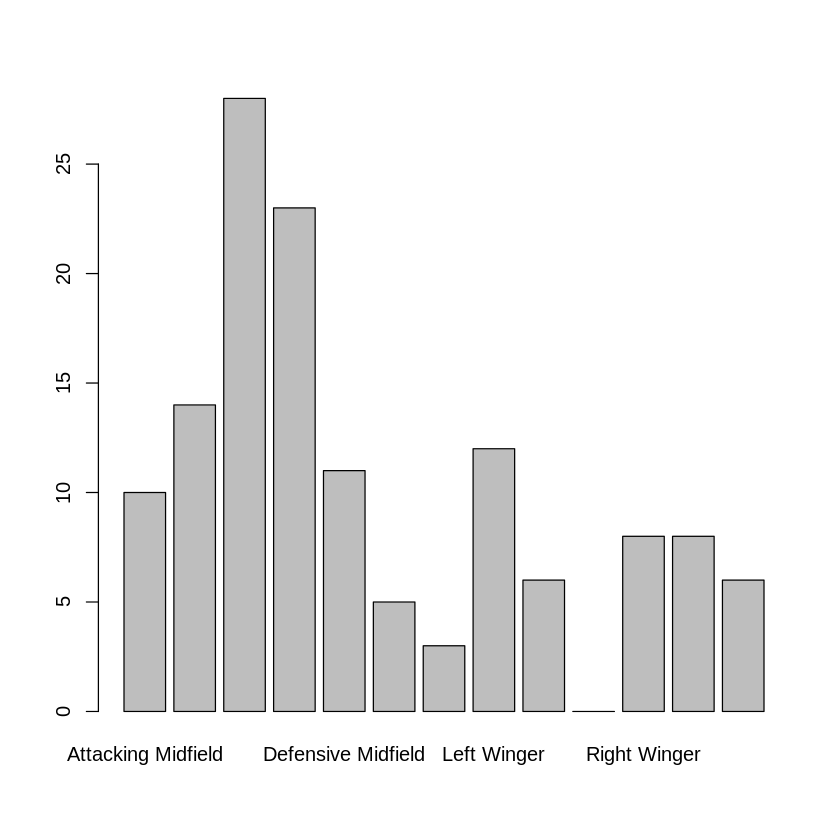

In [66]:
table(df_futbol$Player_position)
plot(df_futbol$Player_position)

In [67]:
plot(table(df_futbol$Transfer_season),
    col = "blue",
    xlab = "Temporada"
    ylab = "Cantidad de jugadores",
    main = "Histogram de cantidad de jugadores por temporada de transfer",
    lwd = 20,)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:5: unexpected symbol
3:     xlab = "Temporada"
4:     ylab
       ^


### Diagrama de torta
Un gráfico circular es un gráfico estadístico circular, que se divide en sectores para ilustrar la proporción numérica. Abaja mostramos un ejemplo con la proporción de jugadores quienes van a las distintas divisiones en Europa.

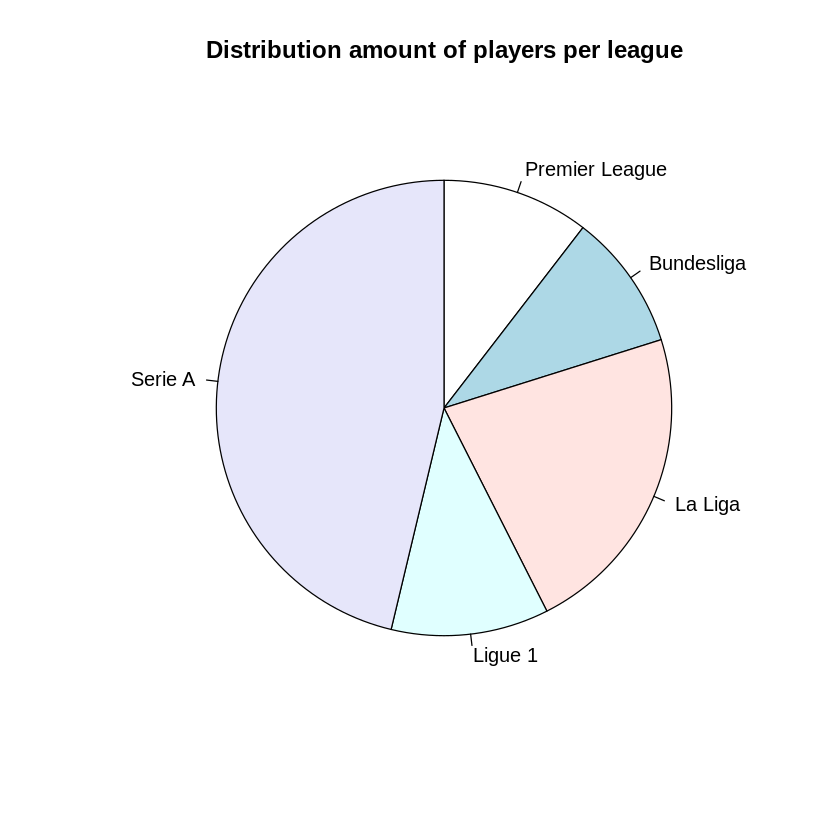

In [68]:
PL_amount <-       length(which(df_futbol$Transfer_to_division == "Premier League"))
BundesL_amount <-  length(which(df_futbol$Transfer_to_division == "Bundesliga"))
LaLiga_amount <-   length(which(df_futbol$Transfer_to_division == "LaLiga"))
Ligue1_amount <-   length(which(df_futbol$Transfer_to_division == "Ligue 1"))
SerieA_amount <-   length(which(df_futbol$Transfer_to_division == "Serie A"))

League_amount <- c(PL_amount, BundesL_amount, LaLiga_amount, Ligue1_amount, SerieA_amount)
League_names = c("Premier League", "Bundesliga", "La Liga", "Ligue 1", "Serie A")

pie(League_amount, 
    labels = League_names, 
    #radius = 1, 
    main = "Distribution amount of players per league", 
    clockwise = TRUE)

### Gráfico de líneas
Un gráfico de líneas o un gráfico de líneas o un gráfico de líneas es un tipo de gráfico que muestra información como una serie o puntos de datos llamados 'marcadores' conectados por segmentos de línea.

En el ejemplo abajo, presentamos la evolución de gastos por transfer por temporada. Para mostrarlo, primero tenemos que calcularlo. Mostramos dos metodos. 

En el primer methodo, utilizamos un for loop para sumar todos los gastos por temporada. Aunque este methodo es perfectamente correcto, se puede hacerlo mucho mas eficiente como mostramos más abajo.

In [69]:
spendings_0910 <- 0
spendings_1011 <- 0
spendings_1112 <- 0
spendings_1213 <- 0
spendings_1314 <- 0

for (i in 1:nrow(df_futbol)) {
  if (df_futbol$Transfer_season[i] == "09/10"){
    spendings_0910 = spendings_0910 + df_futbol$Transfer_fee[i]
  }
  else if (df_futbol$Transfer_season[i] == "10/11"){
    spendings_1011 = spendings_1011 + df_futbol$Transfer_fee[i]
  }
  else if (df_futbol$Transfer_season[i] == "11/12"){
    spendings_1112 = spendings_1112 + df_futbol$Transfer_fee[i]
  }
  else if (df_futbol$Transfer_season[i] == "12/13"){
    spendings_1213 = spendings_1213 + df_futbol$Transfer_fee[i]
  }
  else{
    spendings_1314 = spendings_1314 + df_futbol$Transfer_fee[i]
  }
}


x <- c(1,2,3,4,5)
y <- c(spendings_0910,
       spendings_1011,
       spendings_1112,
       spendings_1213,
       spendings_1314)

x
y

[1] 1 2 3 4 5

[1]  86585000 103610000 103910000 160180000 178730000

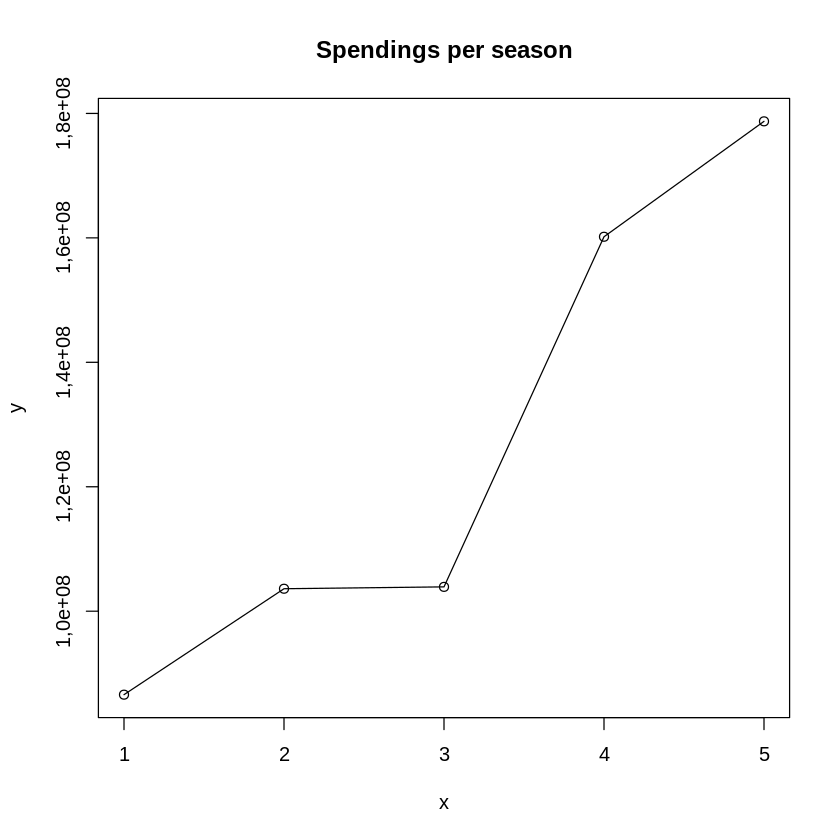

In [56]:
plot(x, y, type = 'n', main = "Spendings per season")
lines(x, y, type = 'o')

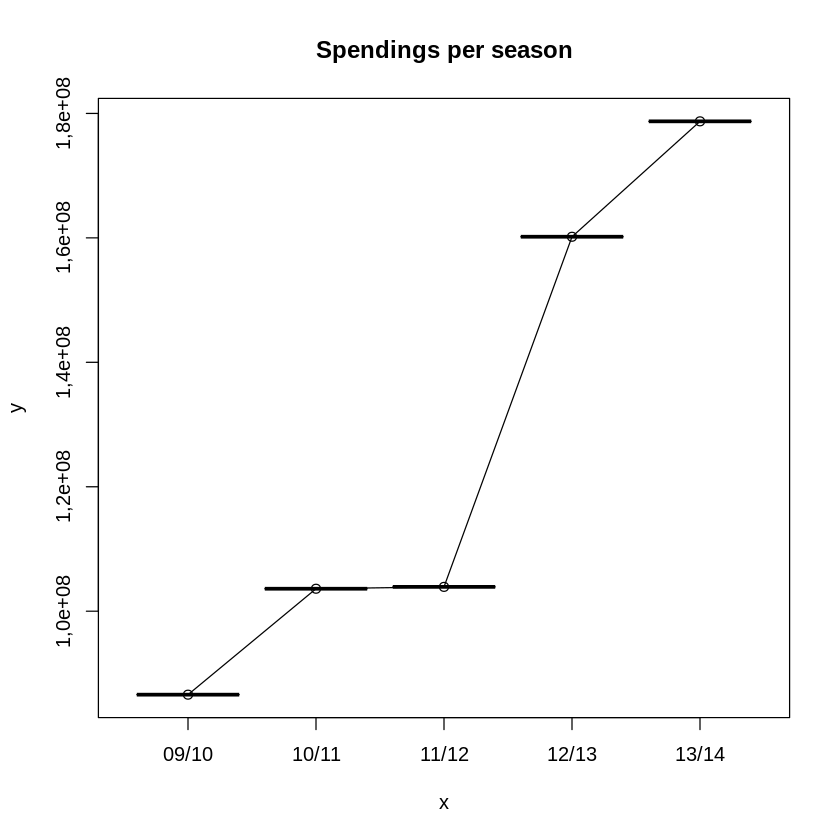

In [70]:
spendings_per_season <- df_futbol %>% group_by(Transfer_season) %>% summarise(sum_transfers = sum(Transfer_fee))

x <- spendings_per_season$Transfer_season
y <- spendings_per_season$sum_transfers

plot(x, y, type = 'n', main = "Spendings per season")
lines(x, y, type = 'o')

### Boxplot

Un diagrama de caja es un resumen gráfico de una variable basada en la representación de cinco dígitos. Este resumen de cinco dígitos consta del mínimo, el primer cuartil, la mediana (o segundo cuartil), el tercer cuartil y el máximo de los datos observados.

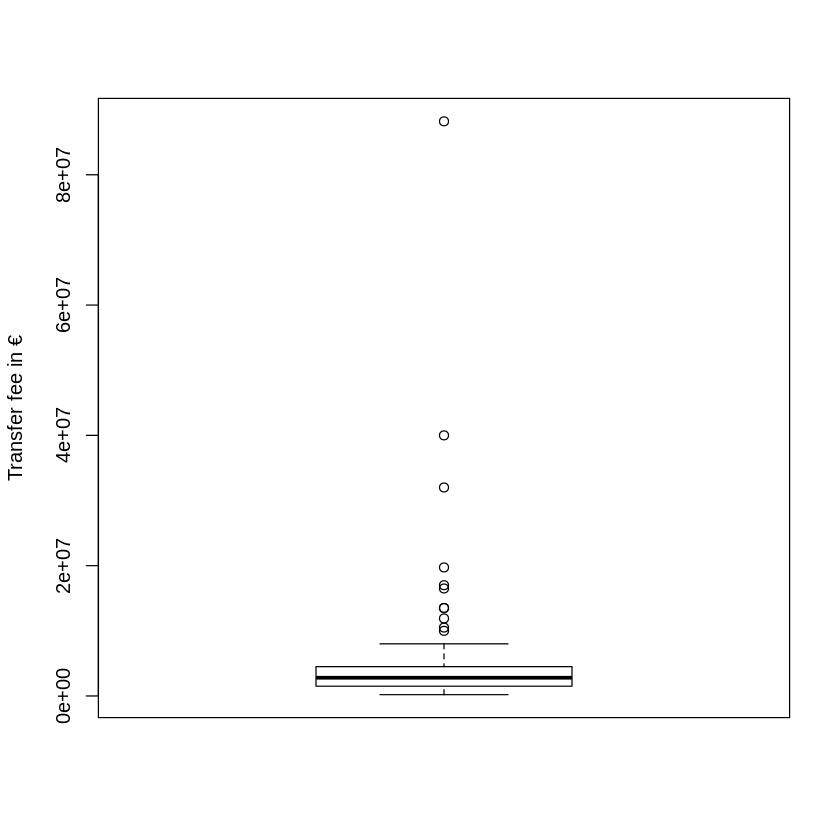

In [71]:
boxplot(df_futbol$Transfer_fee,
        ylab = "Transfer fee in €"
        #ylim = c(0, 10000000)
       )

### Stacked histogram

Un gráfico de barras apiladas es un gráfico que utiliza barras para mostrar comparaciones entre categorías de datos, pero con la capacidad de presentar otro variable en las barras. 

Abajo mostramos un histogram de las divisiones destinarios y aplicamos un color cual presenta la distribución de jugadores exitosos vs no-exitosos.

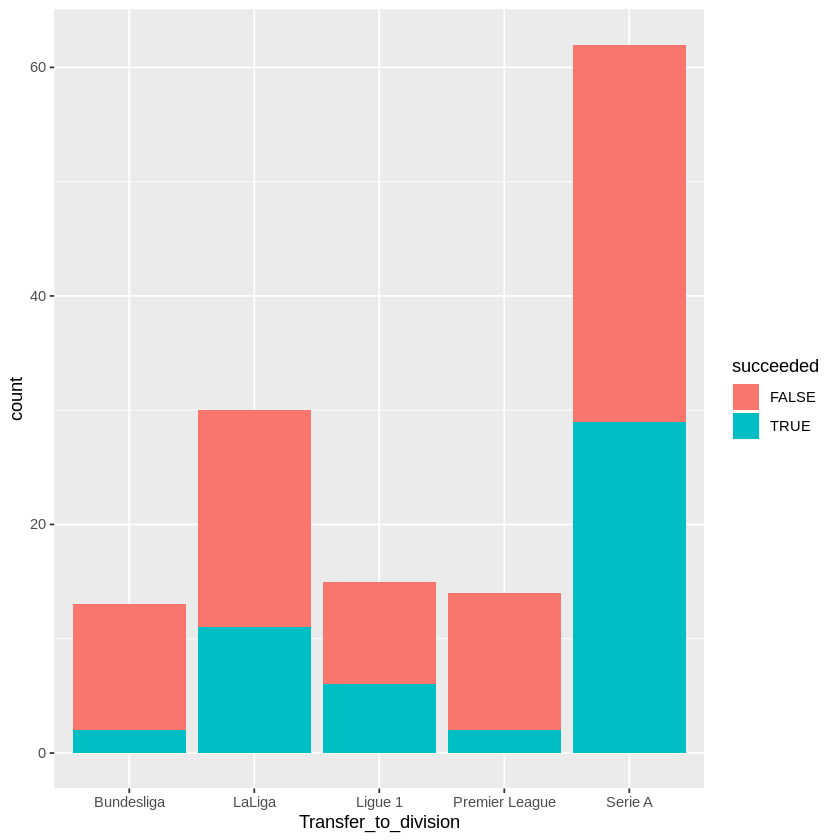

In [72]:
ggplot(df_futbol, aes(x=Transfer_to_division, fill=succeeded)) +
  geom_bar()

### Stacked area chart
Un gráfico de área apilada es la extensión de un gráfico de área básico para mostrar la evolución del valor de varios grupos en el mismo gráfico. Los valores de cada grupo se muestran uno encima del otro.

Abajo mostramos la evolución de gastos por año y además la distribución de gastos totales por división destinario.  

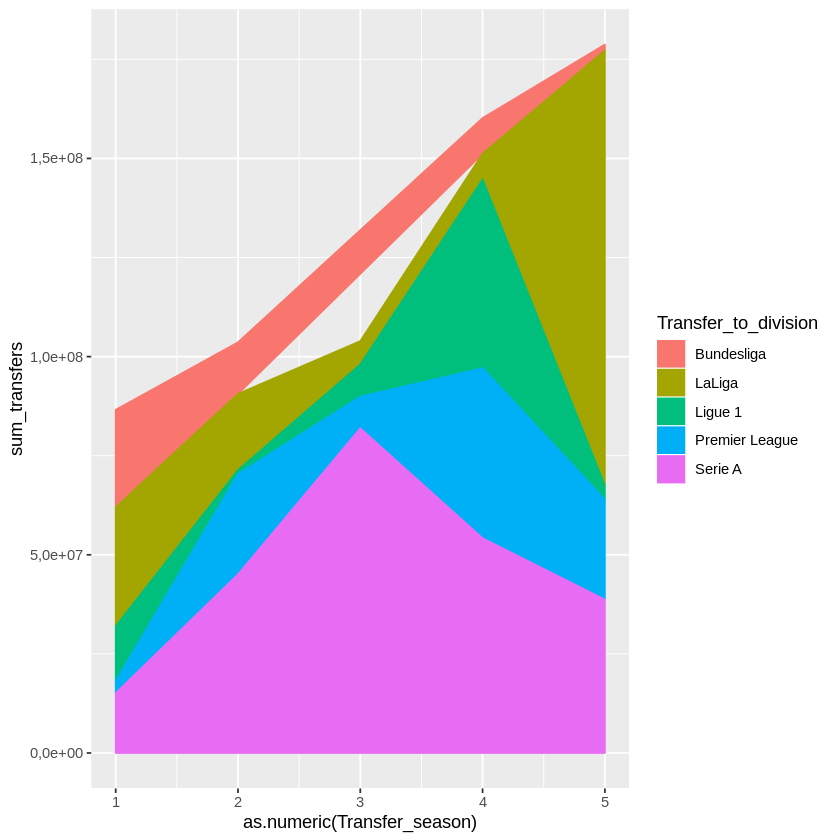

In [73]:
spendings_per_season_division <- df_futbol %>% group_by(Transfer_season, Transfer_to_division) %>% summarise(sum_transfers = sum(Transfer_fee))

gg <- ggplot(spendings_per_season_division, aes(x=as.numeric(Transfer_season), y=sum_transfers))
# Nota que X tiene que ser numeric, sino no funciona.
gg <- gg + geom_area(aes(colour=Transfer_to_division, fill=Transfer_to_division))
gg

<a id='TAREA3'></a>
# TAREA: Visualizaciónes + Data understanding
[Inicio ▲](#Indice)

### 1. En el summary vemos algunos nombres estan 4 veces en la lista. Como es posible? Investiga, verifica su hypothesis y borra filas duplicados si es necesario.

In [76]:
name_check <- df_futbol[df_futbol$Player_name == "Maicosuel" | df_futbol$Player_name == "Marcos Angeleri",]
name_check

,X,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after,succeeded
117,117,Maicosuel,Left Winger,26,12/13,Série A,Botafogo,Serie A,Udinese Calcio,5300000,2500000,No,No,3000000,Yes,3e+06,FALSE
120,120,Maicosuel,Left Winger,23,09/10,Brazil,Desp. Brasil,Bundesliga,TSG Hoffenheim,4500000,2000000,Yes,Yes,4500000,Yes,4e+06,FALSE
123,123,Marcos Angeleri,Centre-Back,30,13/14,Torneo Final,Estudiantes,LaLiga,Málaga CF,230000,500000,No,No,1500000,Yes,1e+05,FALSE
126,126,Marcos Angeleri,Centre-Back,27,10/11,Torneo Final,Estudiantes,Premier League,Sunderland,1800000,3500000,Yes,No,NA,Yes,0e+00,FALSE


Vemos que los jugadores hicieron dos transfers en el periodo de alcance, cada transfer es guardado dos veces con distintos "valor de mercado". Tenemos que buscar en transfermarkt cual es la observación correcto y borrar los otros.

Haciendo eso, concluimos que tenemos que borrar filas 118, 119, 124, 125

In [75]:
df_futbol <- df_futbol[!grepl(118, df_futbol$X),]
df_futbol <- df_futbol[!grepl(119, df_futbol$X),]
df_futbol <- df_futbol[!grepl(124, df_futbol$X),]
df_futbol <- df_futbol[!grepl(125, df_futbol$X),]

### 2. El histogram de distintas posiciones no nos da una vista muy clara. Arma un codigo para agregar un nuevo variable cual grupa las posiciones en 4 categorias. (Golero, Defensa, Media cancha, Adelante)
Una forma puede ser con un for loop y if statements. Abajo se puede encontrar un ejemplo de un 'for loop' y un 'if else if else' syntax. 

#### for loop

In [49]:
for(i in 1:nrow(dataFrame)) {
    dataFrame$variable[i] <- "Uruguay"
    # Escribe "Uruguay" en todas las filas de la variable
}

# Si se utilize un variable que no existe, R va automaticamente crear este variable

ERROR: Error in nrow(dataFrame): objeto 'dataFrame' no encontrado


#### if statements

In [ ]:
if (!exists("A") & exists("B")) {
  C= B} 
else if (exists("A") & !exists("B")) {
  C= A}
else if (exists("A") & exists("B")) {
  C= rbind(B,A)} 
else {C <- NULL}

# Nota que en R se tiene if, else if y else
# El if statement siempre esta entre ()
# Se logro OR con "|"

In [77]:
unique(df_futbol$Player_position)

[1] Right Winger       Centre-Forward     Centre-Back        Central Midfield  
 [5] Defensive Midfield Left Winger        Right-Back         Left-Back         
 [9] Attacking Midfield Left Midfield      Second Striker     Goalkeeper        
13 Levels: Attacking Midfield Central Midfield Centre-Back ... Second Striker

In [78]:
for (i in 1:nrow(df_futbol)){
    if (df_futbol$Player_position[i] == "Goalkeeper"){
       df_futbol$Player_position_cat[i] <- "Golero"  
    } 
    else if (df_futbol$Player_position[i] == "Right-Back" | 
             df_futbol$Player_position[i] == "Left-Back" | 
             df_futbol$Player_position[i] == "Centre-Back") {
       df_futbol$Player_position_cat[i] <- "Defensa"  
    }
    else if (df_futbol$Player_position[i] == "Right Winger" |
             df_futbol$Player_position[i] == "Left Winger" | 
             df_futbol$Player_position[i] == "Second Striker" | 
             df_futbol$Player_position[i] == "Centre-Forward") {
       df_futbol$Player_position_cat[i] <- "Adelante"  
    }
    else {
       df_futbol$Player_position_cat[i] <- "Media" 
    }
}

### 3. Visualiza su nuevo variable de posiciones en un histogram.

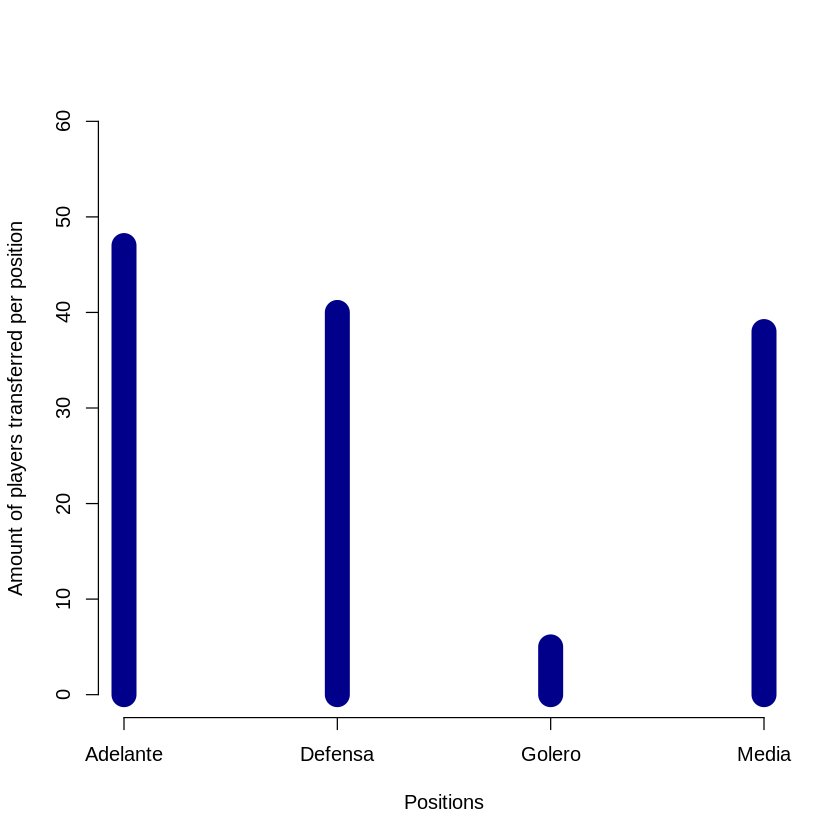

In [79]:
plot(table(df_futbol$Player_position_cat),
     type = "h", 
     lwd = 20, 
     col = "dark blue", 
     xlab = "Positions", 
     ylab = 'Amount of players transferred per position',
     ylim = c(0, 60))

### 4.  Visualiza de nuevo la nueva variable, pero ahora implementa también que el color muestra la distribución de succeeded. Describe que se observa.

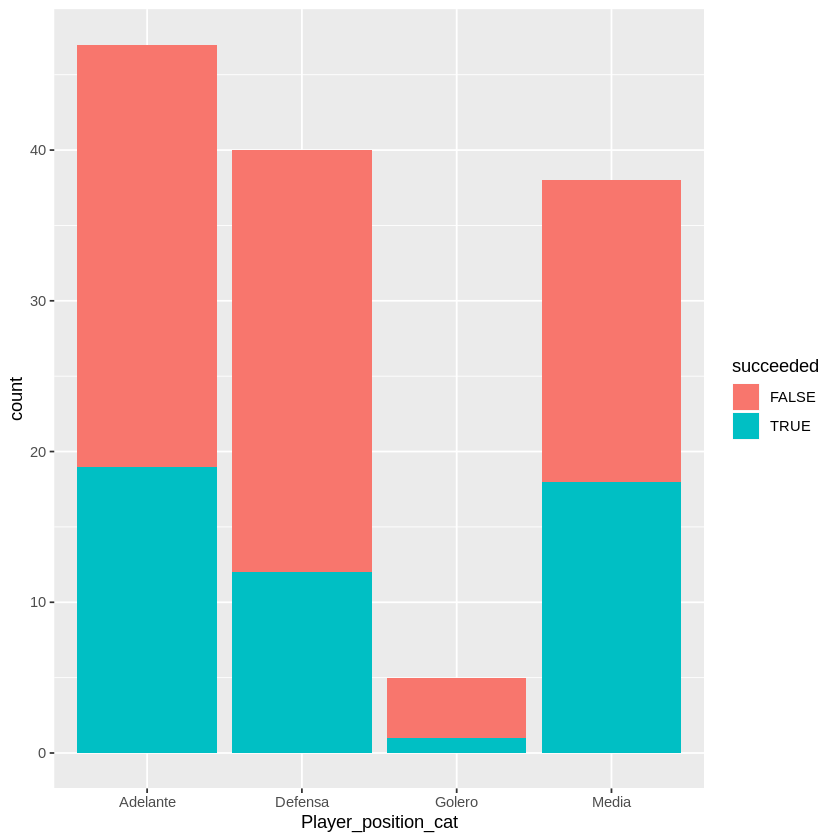

In [80]:
ggplot(df_futbol, aes(x=Player_position_cat, fill=succeeded)) +
  geom_bar()

### 5. Arma otro stacked histogram, esta vez de las distintas divisiones y el color presentado las distintas posiciones.

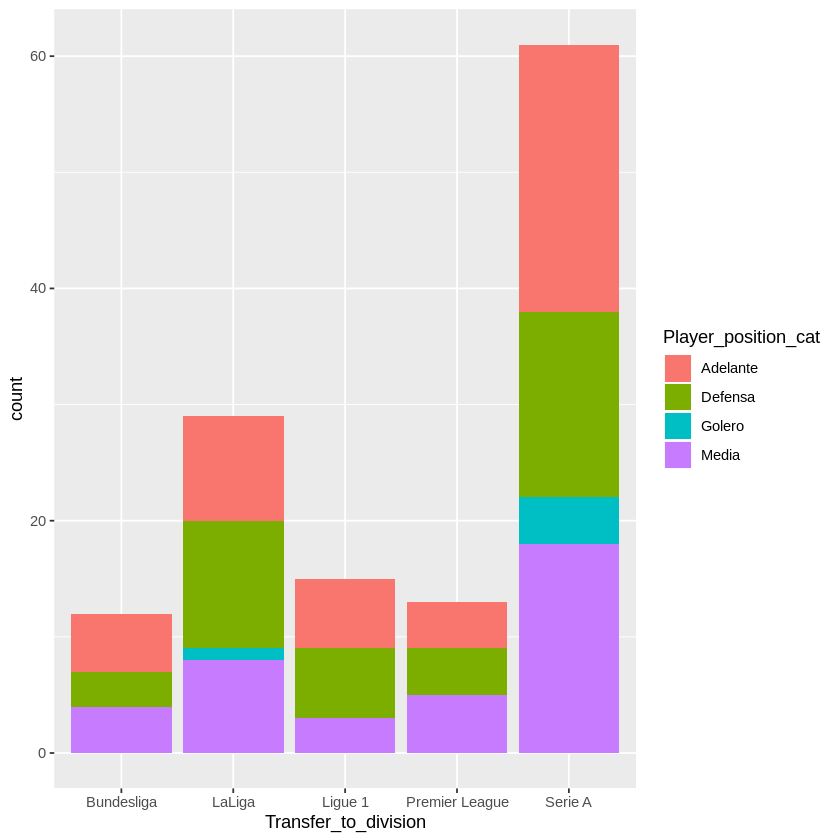

In [81]:
ggplot(df_futbol, aes(x=Transfer_to_division, fill=Player_position_cat)) +
  geom_bar()

### 6. Arma un stacked area chart, para los MV_4y_high por los distintas temporadas y por división. Describe lo que se observa. 

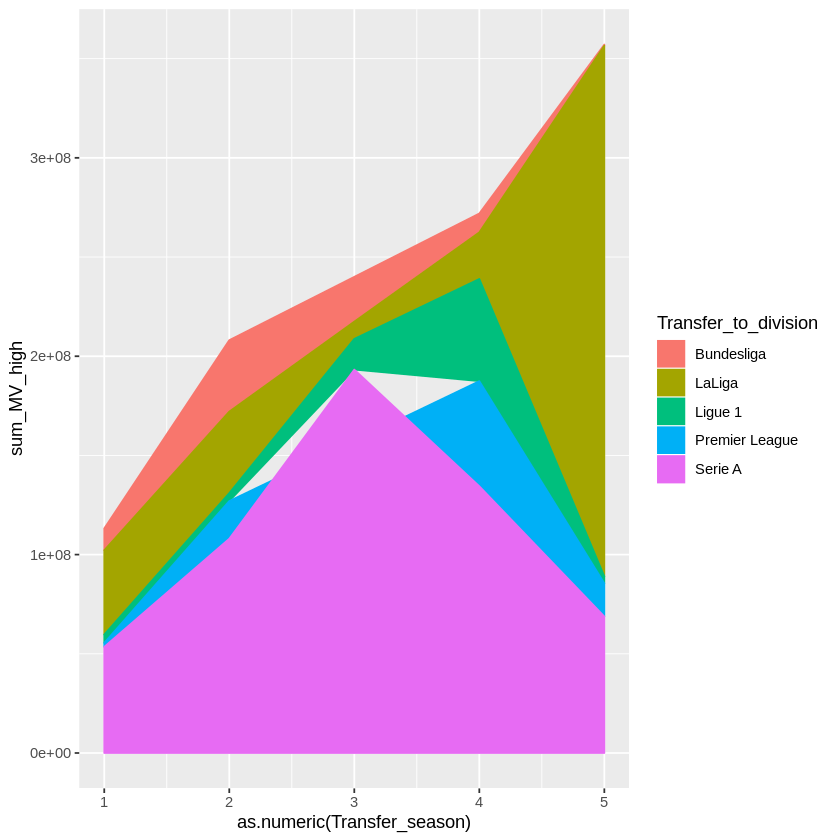

In [82]:
df_futbol_4y <- df_futbol[is.na(df_futbol$MV_4y_high) == FALSE,]

MVhigh_season_division <- df_futbol_4y %>% group_by(Transfer_season, Transfer_to_division) %>% summarise(sum_MV_high = sum(MV_4y_high))

gg <- ggplot(MVhigh_season_division, aes(x=as.numeric(Transfer_season), y=sum_MV_high))
# Nota que X tiene que ser numeric, sino no funciona.
gg <- gg + geom_area(aes(colour=Transfer_to_division, fill=Transfer_to_division))
gg

<a id='Modelling'></a>
# Modelling: desarrollando un modelo predictivo
[Inicio ▲](#Indice)

<a id='Training-test'></a>
## Training y test dataset
[Inicio ▲](#Indice)

Para desarrollar un modelo, siempre tenemos que dividir nuestro dataset entre un test y training set. El training set vamos a utilizar para entrenar el modelo, mientras que el test dataset utilizamos para juzgar la calidad del modelo.

In [83]:
df.train <- df_futbol[df_futbol$Transfer_season != "13/14",]
df.test  <- df_futbol[df_futbol$Transfer_season == "13/14",]

<a id='Modelo'></a>
## Modelo - logistic regression
[Inicio ▲](#Indice)

In [84]:
glm.all=glm(succeeded ~ Player_age + Transfer_to_division + First_time_EU + MV_transfer + Transfer_fee, 
            data=df.train, 
            family=binomial)
summary(glm.all)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
glm(formula = succeeded ~ Player_age + Transfer_to_division + 
    First_time_EU + MV_transfer + Transfer_fee, family = binomial, 
    data = df.train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2,006  -0,995  -0,654   1,194   2,063  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)
(Intercept)                        -6,496e-02  2,670e+00  -0,024    0,981
Player_age                         -1,092e-01  9,783e-02  -1,117    0,264
Transfer_to_divisionLaLiga          1,147e+00  1,204e+00   0,953    0,341
Transfer_to_divisionLigue 1         1,830e+00  1,219e+00   1,501    0,133
Transfer_to_divisionPremier League  2,940e-01  1,358e+00   0,216    0,829
Transfer_to_divisionSerie A         1,802e+00  1,113e+00   1,618    0,106
First_time_EUYes                    5,687e-01  6,220e-01   0,914    0,361
MV_transfer                         1,058e-07  1,341e-07   0,789    0,430
Transfer_fee                       -4,957e-08  9,744e-08

<a id='Evaluación'></a>
# Evaluación
[Inicio ▲](#Indice)

In [85]:
glm.probs=predict(glm.all,df.train,type="response")
glm.pred=rep(FALSE,dim(df.train)[1])
glm.pred[glm.probs >0.50]=TRUE
table(glm.pred,df.train$succeeded)
(60+11)/108

        
glm.pred FALSE TRUE
   FALSE    57   28
   TRUE      9   11

[1] 0,6574074

In [86]:
glm.probs=predict(glm.all,df.test,type="response")
glm.pred=rep(FALSE,dim(df.test)[1])
glm.pred[glm.probs >0.50]=TRUE
table(glm.pred,df.test$succeeded)
(14+4)/26

        
glm.pred FALSE TRUE
   FALSE    13    7
   TRUE      1    4

[1] 0,6923077

In [87]:
glm.probs=predict(glm.all,df.test,type="response")
glm.pred=rep(FALSE,dim(df.test)[1])
glm.pred[glm.probs > 0.40]=TRUE
table(glm.pred,df.test$succeeded)

        
glm.pred FALSE TRUE
   FALSE    10    4
   TRUE      4    7